In [35]:
import numpy as np 
import time 
import matplotlib.pyplot as plt 

In [89]:
%matplotlib notebook

class Const:
    def __init__(self):
        self.n_animals = 100
        self.n_steps = 200
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
        self.trap_location = 'corner' 
        self.death_rate = 0.008 #Probability of animal being replaced 
       

In [90]:
def model(c,show_dotses = False,n_trials = 1):
    history = np.zeros((c.n_steps,n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(size=c.n_animals)
        y = np.random.uniform(size=c.n_animals)
        vx = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)

        
        # Capture
        if c.trap_location == 'corner':
            color = np.where(np.logical_and(x<c.trap_size , y<c.trap_size), 1, 0) # All captured are color1, all free ones are color0
        else:
            color = np.where((x<0.5 + c.trap_size/2)*(x> 0.5 - c.trap_size/2)*(y< 0.5 + c.trap_size/2)*(y>0.5-c.trap_size/2), 1, 0) # All captured are color1, all free ones are color0
        
        n_marked = np.sum(color)

        estimation = np.zeros(c.n_steps)  # Main output variable. At every point in time
                                        # .. we'll remember the estimation for N an ecologist could have made 

        if show_dotses: # Plotting
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            # Moving elks around
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            is_replaced = np.random.uniform(size = c.n_animals)<c.death_rate
            color[is_replaced] = 0 #These lose color 
        

            # Recapture
            if c.trap_location== 'corner':
                
                good =(x<c.trap_size)* (y<c.trap_size)
            else:
                good = (x<0.5 + c.trap_size/2)*(x> 0.5 - c.trap_size/2)*(y< 0.5 + c.trap_size/2)*(y>0.5-c.trap_size/2) # All captured are color1, all free ones are color0
        
            n_recaptured_total = np.sum(good)
            n_recaptured_marked = np.sum(good*color) # Condition1 AND cond2 AND color==1
            
                
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # <--------------- The main command to make it move

        history[:,i_trial] = estimation
    return np.mean(history,axis=1)

<IPython.core.display.Javascript object>


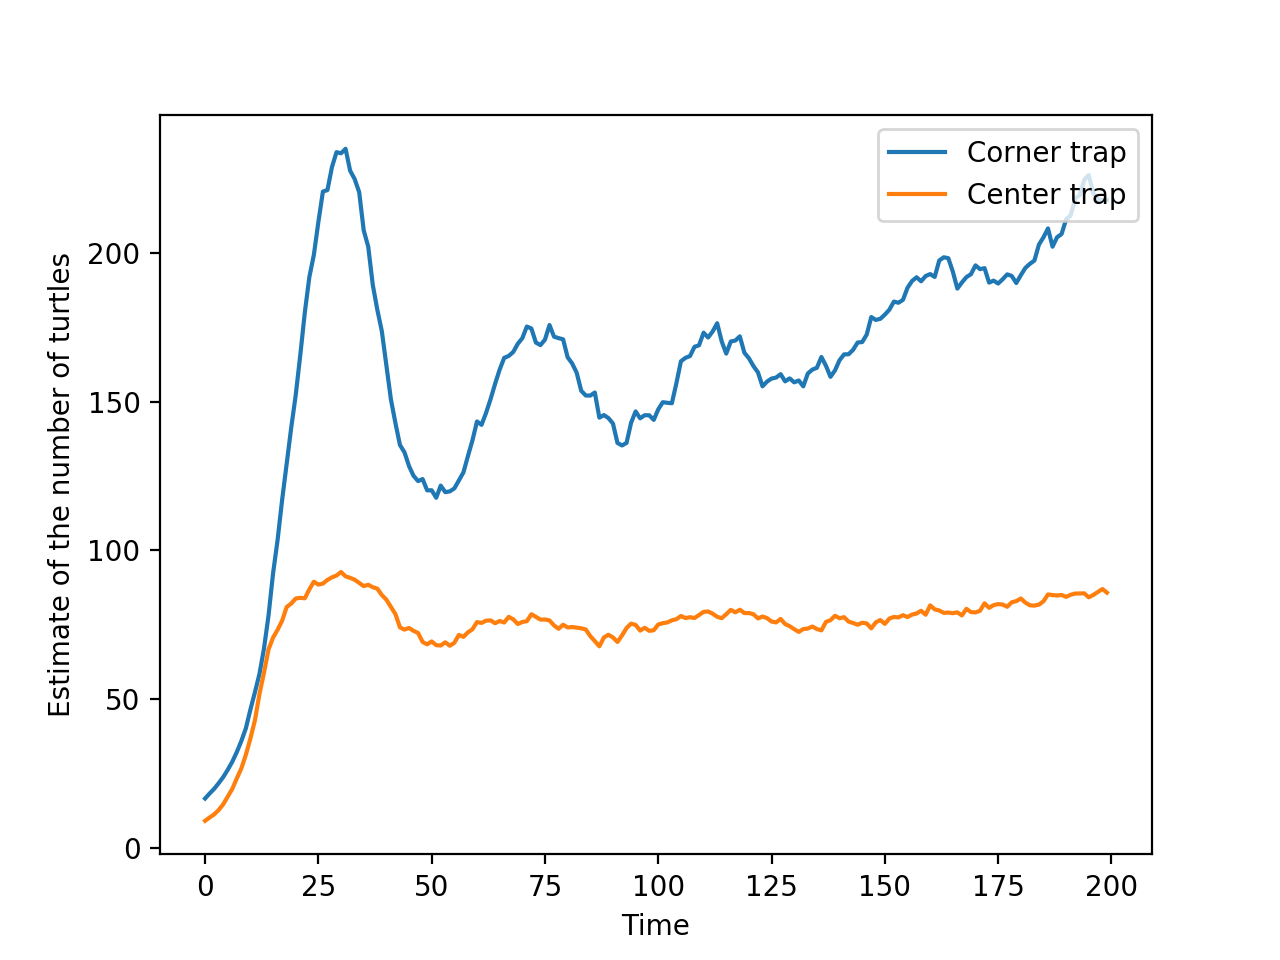

In [91]:
# Main program

c = Const()
curve1 = model(c,False, 200)
c.trap_size = 0.3
curve2 = model(c,False,200)
plt.figure()
plt.plot(curve1, label = 'Corner trap')
plt.plot(curve2, label = 'Center trap')
plt.legend (loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles');



<IPython.core.display.Javascript object>


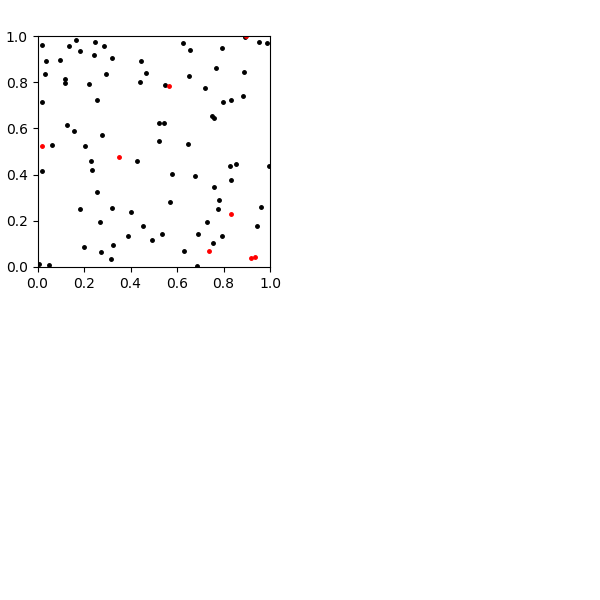

NameError: name 'VERBOSE' is not defined

In [54]:
model(c,True);